In [23]:
import numpy as np

left_outputs = np.load("/workspace/data/sam3d_body_results/run_3/osmo_1_sam_3d_body_outputs.npz", allow_pickle=True)['outputs']
right_outputs = np.load("/workspace/data/sam3d_body_results/run_3/osmo_2_sam_3d_body_outputs.npz", allow_pickle=True)['outputs']

In [24]:
left_outputs[0].keys()

dict_keys(['bbox', 'focal_length', 'pred_keypoints_3d', 'pred_keypoints_2d', 'pred_vertices', 'pred_cam_t', 'pred_pose_raw', 'global_rot', 'body_pose_params', 'hand_pose_params', 'scale_params', 'shape_params', 'expr_params', 'mask', 'pred_joint_coords', 'pred_global_rots', 'lhand_bbox', 'rhand_bbox', 'frame'])

In [25]:
len(left_outputs)

360

In [26]:
for k, v in left_outputs[0].items():
	if isinstance(v, np.ndarray):
		print(k, v.shape)
	elif v is None:
		print(k, v)

bbox (4,)
pred_keypoints_3d (70, 3)
pred_keypoints_2d (70, 2)
pred_vertices (18439, 3)
pred_cam_t (3,)
pred_pose_raw (266,)
global_rot (3,)
body_pose_params (133,)
hand_pose_params (108,)
scale_params (28,)
shape_params (45,)
expr_params (72,)
mask None
pred_joint_coords (127, 3)
pred_global_rots (127, 3, 3)
lhand_bbox (4,)
rhand_bbox (4,)
frame (1080, 1920, 3)


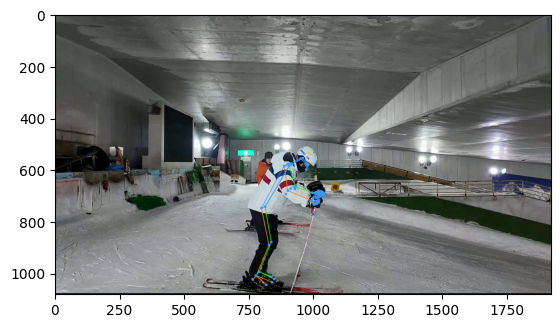

In [27]:
# draw left and right 3d pose in one plot 
# 连线
import sys
import os
import matplotlib.pyplot as plt

parent_dir = os.path.dirname(os.getcwd()) 
sys.path.insert(0, parent_dir)

one_sample = left_outputs[0]
img_vis = one_sample["frame"].copy()

from sam3d_body.infer import setup_visualizer
from sam3d_body.vis import (
    visualize_2d_results, visualize_3d_mesh,
    display_results_grid, 
)

# Set up visualizer
visualizer = setup_visualizer()


# Draw keypoints
keypoints_2d = one_sample["pred_keypoints_2d"]
keypoints_2d_vis = np.concatenate(
	[keypoints_2d, np.ones((keypoints_2d.shape[0], 1))], axis=-1
)
img_vis = visualizer.draw_skeleton(img_vis, keypoints_2d_vis)

plt.imshow(img_vis)


(70, 3)


/tmp/ipykernel_521750/431286961.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_3d.show()


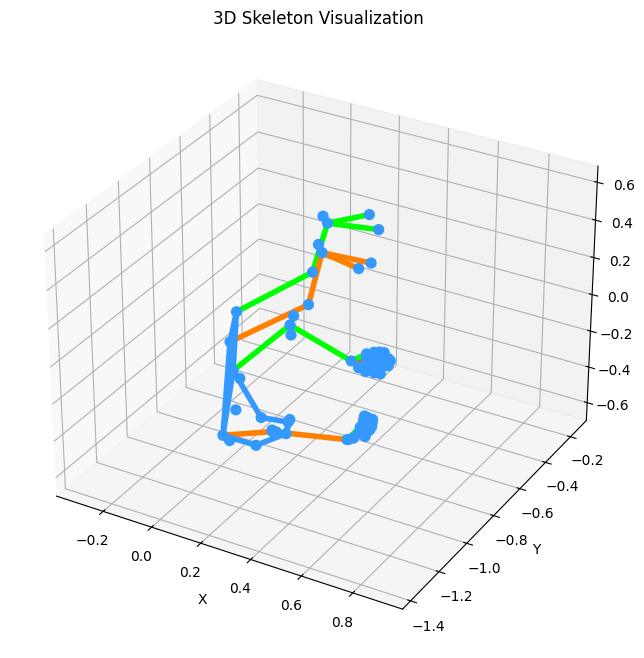

In [28]:
keypoints_3d = one_sample["pred_keypoints_3d"]

print(keypoints_3d.shape)
fig_3d = visualizer.draw_skeleton_3d(keypoints_3d)

fig_3d.show()

In [29]:
visualizer.skeleton

[(13, 11),
 (11, 9),
 (14, 12),
 (12, 10),
 (9, 10),
 (5, 9),
 (6, 10),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 62),
 (8, 41),
 (1, 2),
 (0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (13, 15),
 (13, 16),
 (13, 17),
 (14, 18),
 (14, 19),
 (14, 20),
 (62, 45),
 (45, 44),
 (44, 43),
 (43, 42),
 (62, 49),
 (49, 48),
 (48, 47),
 (47, 46),
 (62, 53),
 (53, 52),
 (52, 51),
 (51, 50),
 (62, 57),
 (57, 56),
 (56, 55),
 (55, 54),
 (62, 61),
 (61, 60),
 (60, 59),
 (59, 58),
 (41, 24),
 (24, 23),
 (23, 22),
 (22, 21),
 (41, 28),
 (28, 27),
 (27, 26),
 (26, 25),
 (41, 32),
 (32, 31),
 (31, 30),
 (30, 29),
 (41, 36),
 (36, 35),
 (35, 34),
 (34, 33),
 (41, 40),
 (40, 39),
 (39, 38),
 (38, 37)]

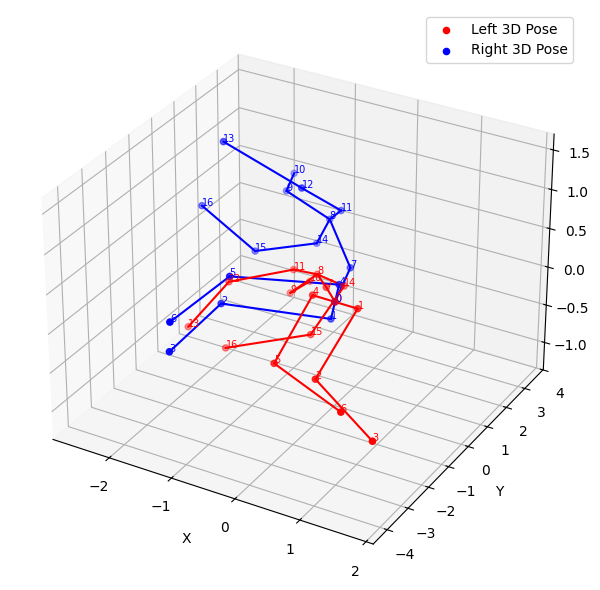

In [ ]:

Rt_n[:, 0] *= -1  # mirror x axis
# Rt_n[:, 1] *= -1  # flip y axis
Rt_n[:, 2] *= -1  # flip z axis

# draw left and right 3d pose in one plot 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Lt_n[:, 0], Lt_n[:, 1], Lt_n[:, 2], c='r', label='Left 3D Pose')
ax.scatter(Rt_n[:, 0], Rt_n[:, 1], Rt_n[:, 2], c='b', label='Right 3D Pose')


for a, b in H36M17_EDGES:
    ax.plot([Lt_n[a, 0], Lt_n[b, 0]],
            [Lt_n[a, 1], Lt_n[b, 1]],
            [Lt_n[a, 2], Lt_n[b, 2]], c='r')
    ax.plot([Rt_n[a, 0], Rt_n[b, 0]],
            [Rt_n[a, 1], Rt_n[b, 1]],
            [Rt_n[a, 2], Rt_n[b, 2]], c='b')
        
# 标注点的索引
for i, (xi, yi, zi) in enumerate(zip(Lt_n[:, 0], Lt_n[:, 1], Lt_n[:, 2])):
    ax.text(xi, yi, zi, f"{i}", color="red", fontsize=7)

for i, (xi, yi, zi) in enumerate(zip(Rt_n[:, 0], Rt_n[:, 1], Rt_n[:, 2])):
    ax.text(xi, yi, zi, f"{i}", color="blue", fontsize=7)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.legend()
fig.tight_layout()
plt.show()      

left_outputs
[-0.45446438  1.5032961   2.993183  ]
[[[ 1.          0.          0.        ]
  [ 0.          1.          0.        ]
  [ 0.          0.          1.        ]]

 [[ 0.11190611  0.15946792  0.98083985]
  [-0.10842217  0.9831064  -0.1474663 ]
  [-0.9877862  -0.08984241  0.12730551]]

 [[ 0.1609256  -0.9826135   0.09259462]
  [-0.9859548  -0.16429856 -0.02998659]
  [ 0.04467838 -0.08646849 -0.9952523 ]]

 ...

 [[ 0.10167468  0.8932296   0.43795338]
  [ 0.09566197  0.42941606 -0.898026  ]
  [-0.99020755  0.13320199 -0.04178739]]

 [[ 0.10167468  0.8932296   0.43795338]
  [ 0.09566197  0.42941606 -0.898026  ]
  [-0.99020755  0.13320199 -0.04178739]]

 [[ 0.89322954  0.426067    0.14355421]
  [ 0.42941606 -0.903068    0.00836194]
  [ 0.13320196  0.05417535 -0.98960716]]]
right_outputs
[-0.03981623  1.0632429   2.1117475 ]
[[[ 1.          0.          0.        ]
  [ 0.          1.          0.        ]
  [ 0.          0.          1.        ]]

 [[-0.07588461 -0.17705134 -0.9812718

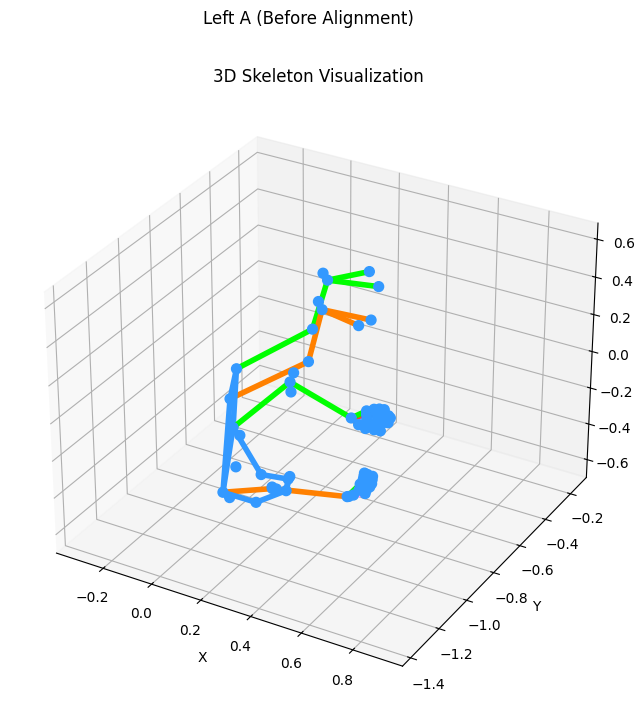

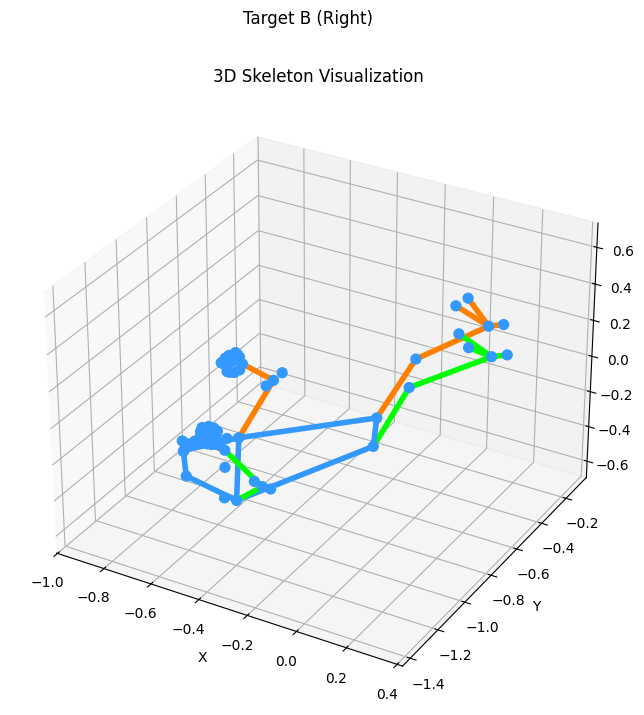

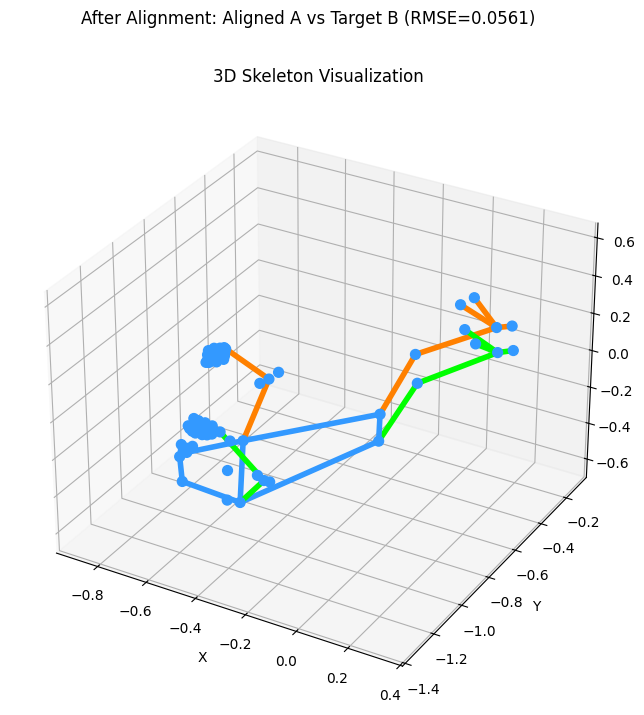

In [31]:
# Visualization of 3D point set alignment with Kabsch (SVD) in NumPy

import numpy as np
import json
import matplotlib.pyplot as plt

# =========================================================================
# 1) H36M 17 关键点骨架连线定义 (sam3d_body 常用)
# =========================================================================
# 定义骨架连线： (点a, 点b) 的索引对
# 关键点顺序通常基于 H36M 17 或其变体
H36M17_EDGES = np.array([
    [0, 1], [1, 2], [2, 3],  # 右腿: 盆骨-右髋-右膝-右脚
    [0, 4], [4, 5], [5, 6],  # 左腿: 盆骨-左髋-左膝-左脚
    [0, 7], [7, 8], [8, 9],  # 脊柱和头: 盆骨-脊柱-颈部-鼻子/头顶
    [8, 10], [10, 11], [11, 12],  # 左臂: 颈部-左肩-左肘-左手腕
    [8, 13], [13, 14], [14, 15]   # 右臂: 颈部-右肩-右肘-右手腕
    # 也可以添加头部连线，如 [9, 16] 鼻子到头顶
], dtype=np.int32)


# ---------- 2) Helper: rigid transform via SVD (Kabsch) ----------
def rigid_transform_3D(A, B):
    """
    Compute R, t that aligns Nx3 points A to B (minimizing least squares).
    A: Source points (Nx3)
    B: Target points (Nx3)
    Returns rotation matrix R (3x3) and translation t (3,).
    """
    assert A.shape == B.shape and A.shape[1] == 3

    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)

    # 居中化
    AA = A - centroid_A
    BB = B - centroid_B

    # 协方差矩阵 H
    H = AA.T @ BB
    # SVD
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

    # 处理反射 (如果确定是刚性变换，R的行列式必须是 +1)
    if np.linalg.det(R) < 0:
        # 反转 U 或 V 的其中一列/行
        Vt[-1, :] *= -1
        R = Vt.T @ U.T

    # 计算平移向量
    t = centroid_B - R @ centroid_A
    return R, t

# =========================================================================
# 3) 创建合成示例 (模拟 sam3d_body 的 3D 关键点输入)
# =========================================================================

# 模拟 Ground Truth (Target B)
Lt_n = left_outputs[0]['pred_keypoints_3d']  # 使用左侧关键点作为目标 B
Rt_n = right_outputs[0]['pred_keypoints_3d']  # 使用右侧关键点作为源 A

print("left_outputs")
print(left_outputs[0]['pred_cam_t'])
print(left_outputs[0]['pred_global_rots'])

print("right_outputs")
print(right_outputs[0]['pred_cam_t'])
print(right_outputs[0]['pred_global_rots'])

# ---------- 4) 恢复变换并对齐 ----------
# 将 Source A (Lt_n) 对齐到 Target B (Rt_n)
R, t = rigid_transform_3D(Lt_n, Rt_n)
print("Rigid Transform:")
print(R, t)
A_aligned = (Lt_n @ R.T) + t

# 计算对齐误差 (RMSE)
rmse = np.sqrt(np.mean(np.sum((A_aligned - Rt_n)**2, axis=1)))


# Plot BEFORE alignment
fig1 = visualizer.draw_skeleton_3d(Lt_n)
fig1.suptitle('Left A (Before Alignment)')
plt.show()

fig2 = visualizer.draw_skeleton_3d(Rt_n)
fig2.suptitle('Target B (Right)')
plt.show()

# Plot AFTER alignment
fig2 = visualizer.draw_skeleton_3d(A_aligned)
fig2.suptitle(f'After Alignment: Aligned A vs Target B (RMSE={rmse:.4f})')
plt.show()


left_outputs (Source A): pred_cam_t, pred_global_rots
[-0.45446438  1.5032961   2.993183  ]
[[[ 1.          0.          0.        ]
  [ 0.          1.          0.        ]
  [ 0.          0.          1.        ]]

 [[ 0.11190611  0.15946792  0.98083985]
  [-0.10842217  0.9831064  -0.1474663 ]
  [-0.9877862  -0.08984241  0.12730551]]

 [[ 0.1609256  -0.9826135   0.09259462]
  [-0.9859548  -0.16429856 -0.02998659]
  [ 0.04467838 -0.08646849 -0.9952523 ]]

 ...

 [[ 0.10167468  0.8932296   0.43795338]
  [ 0.09566197  0.42941606 -0.898026  ]
  [-0.99020755  0.13320199 -0.04178739]]

 [[ 0.10167468  0.8932296   0.43795338]
  [ 0.09566197  0.42941606 -0.898026  ]
  [-0.99020755  0.13320199 -0.04178739]]

 [[ 0.89322954  0.426067    0.14355421]
  [ 0.42941606 -0.903068    0.00836194]
  [ 0.13320196  0.05417535 -0.98960716]]]
right_outputs (Target B): pred_cam_t, pred_global_rots
[-0.03981623  1.0632429   2.1117475 ]
[[[ 1.          0.          0.        ]
  [ 0.          1.          0.       

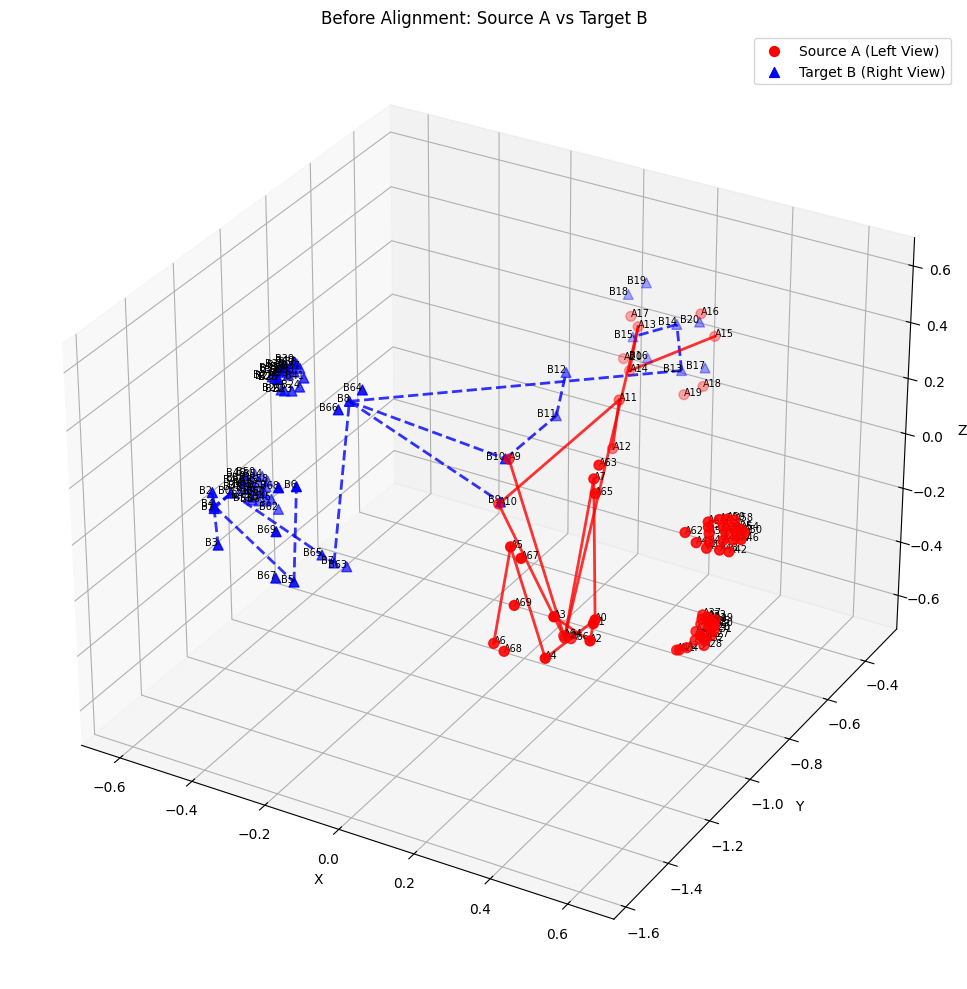

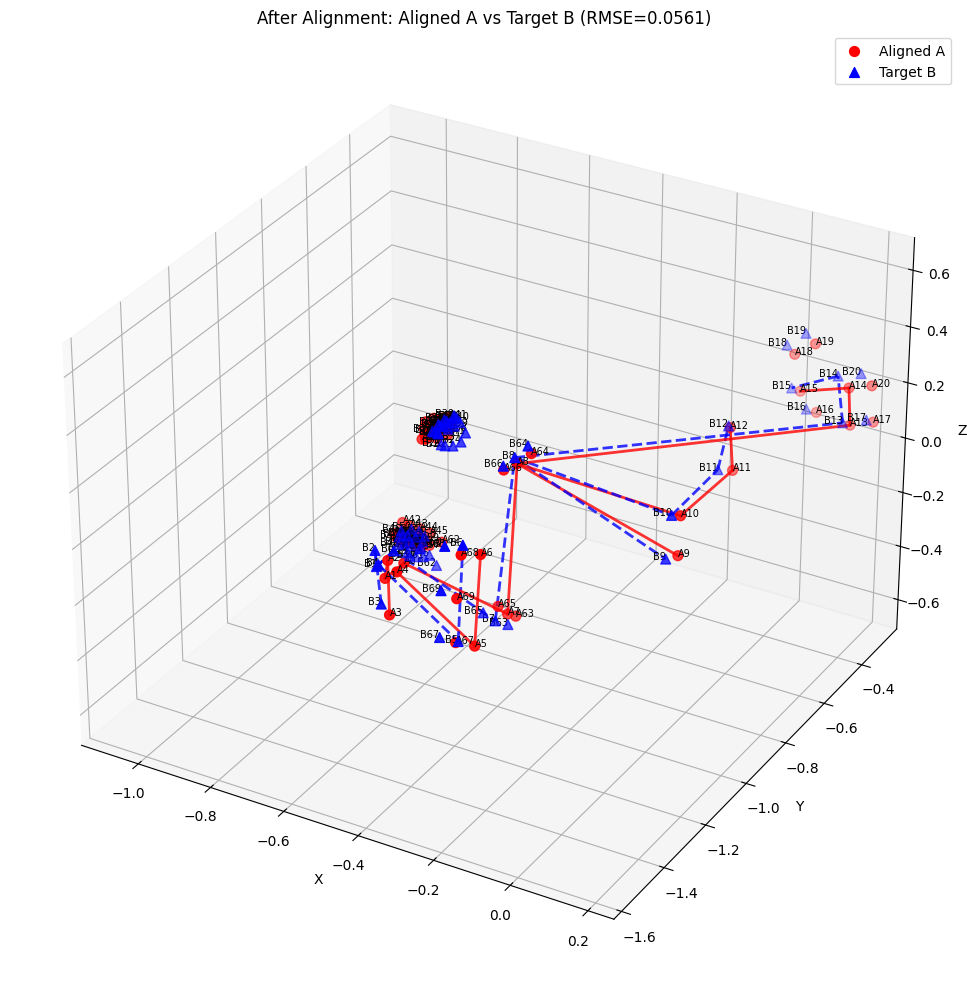

In [32]:
# Visualization of 3D point set alignment with Kabsch (SVD) in NumPy

import numpy as np
import json
import matplotlib.pyplot as plt

# =========================================================================
# 1) H36M 17 关键点骨架连线定义 (sam3d_body 常用)
# =========================================================================
# 定义骨架连线： (点a, 点b) 的索引对
H36M17_EDGES = np.array([
    [0, 1], [1, 2], [2, 3],  # 右腿: 盆骨-右髋-右膝-右脚
    [0, 4], [4, 5], [5, 6],  # 左腿: 盆骨-左髋-左膝-左脚
    [0, 7], [7, 8], [8, 9],  # 脊柱和头: 盆骨-脊柱-颈部-鼻子/头顶
    [8, 10], [10, 11], [11, 12],  # 左臂: 颈部-左肩-左肘-左手腕
    [8, 13], [13, 14], [14, 15]   # 右臂: 颈部-右肩-右肘-右手腕
], dtype=np.int32)


# ---------- 2) Helper: rigid transform via SVD (Kabsch) ----------
def rigid_transform_3D(A, B):
    # (此函数保持不变，省略代码以保持简洁)
    # ...
    assert A.shape == B.shape and A.shape[1] == 3

    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)

    AA = A - centroid_A
    BB = B - centroid_B

    H = AA.T @ BB
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = Vt.T @ U.T

    t = centroid_B - R @ centroid_A
    return R, t


# =========================================================================
# 3) 新增绘图函数：同时绘制两个 3D 骨架
# =========================================================================
def plot_3d_skeleton_alignment(A_data, B_data, edges, title, rmse=None, A_label='Source A', B_label='Target B', A_color='red', B_color='blue'):
    """在同一个 3D 图中绘制 Source A 和 Target B 骨架。"""
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    
    # 设置标题
    full_title = title
    if rmse is not None:
        full_title += f' (RMSE={rmse:.4f})'
    ax.set_title(full_title)
    
    # --- 绘制 Source A (点和线) ---
    ax.scatter(A_data[:,0], A_data[:,1], A_data[:,2], label=A_label, marker='o', c=A_color, s=50)
    
    # --- 绘制 Target B (点和线) ---
    ax.scatter(B_data[:,0], B_data[:,1], B_data[:,2], label=B_label, marker='^', c=B_color, s=50)

    # 绘制连线
    for a, b in edges:
        # Source A 骨架连线
        ax.plot([A_data[a, 0], A_data[b, 0]],
                [A_data[a, 1], A_data[b, 1]],
                [A_data[a, 2], A_data[b, 2]], c=A_color, alpha=0.8, linewidth=2)
        # Target B 骨架连线
        ax.plot([B_data[a, 0], B_data[b, 0]],
                [B_data[a, 1], B_data[b, 1]],
                [B_data[a, 2], B_data[b, 2]], c=B_color, alpha=0.8, linewidth=2, linestyle='--')
        
    # 标注点的索引（可选，如果点太多可注释掉）
    for i in range(A_data.shape[0]):
        # 标注 Source A 的索引
        ax.text(A_data[i, 0], A_data[i, 1], A_data[i, 2], f"A{i}", color='black', fontsize=7)
        # 标注 Target B 的索引
        ax.text(B_data[i, 0], B_data[i, 1], B_data[i, 2], f"B{i}", color='black', fontsize=7, ha='right')

    # 设置坐标轴标签和范围（保证比例一致）
    all_data = np.vstack([A_data, B_data])
    max_range = np.array([all_data[:, i].max() - all_data[:, i].min() for i in range(3)]).max() / 2.0
    mid = np.mean(all_data, axis=0)
    
    ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
    ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
    ax.set_zlim(mid[2] - max_range, mid[2] + max_range)
    
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.legend()
    fig.tight_layout()
    return fig


# =========================================================================
# 4) 执行配准和绘图
# =========================================================================

# 模拟 Ground Truth (Target B) 和 Source A
Lt_n = left_outputs[0]['pred_keypoints_3d']    # Source A (预测结果，例如：左摄像头)
Rt_n = right_outputs[0]['pred_keypoints_3d']   # Target B (GT 或另一视图，例如：右摄像头)

# 打印原始位移信息
print("left_outputs (Source A): pred_cam_t, pred_global_rots")
print(left_outputs[0]['pred_cam_t'])
print(left_outputs[0]['pred_global_rots'])

print("right_outputs (Target B): pred_cam_t, pred_global_rots")
print(right_outputs[0]['pred_cam_t'])
print(right_outputs[0]['pred_global_rots'])

# ---------- 配准计算 ----------
R, t = rigid_transform_3D(Lt_n, Rt_n)
print("Rigid Transform (R, t):")
print(R, t)

# 对齐 Source A
A_aligned = (Lt_n @ R.T) + t

# 计算对齐误差 (RMSE)
rmse = np.sqrt(np.mean(np.sum((A_aligned - Rt_n)**2, axis=1)))


# ---------- 绘图展示 ----------

# 1. 配准前对比
fig_before = plot_3d_skeleton_alignment(
    Lt_n, Rt_n, 
    H36M17_EDGES, 
    title='Before Alignment: Source A vs Target B',
    A_label='Source A (Left View)',
    B_label='Target B (Right View)'
)
plt.show(fig_before)

# 2. 配准后对比 (重点查看 RMSE)
fig_after = plot_3d_skeleton_alignment(
    A_aligned, Rt_n, 
    H36M17_EDGES, 
    title='After Alignment: Aligned A vs Target B', 
    rmse=rmse,
    A_label='Aligned A',
    B_label='Target B'
)
plt.show(fig_after)

(3, 3)
(3,)


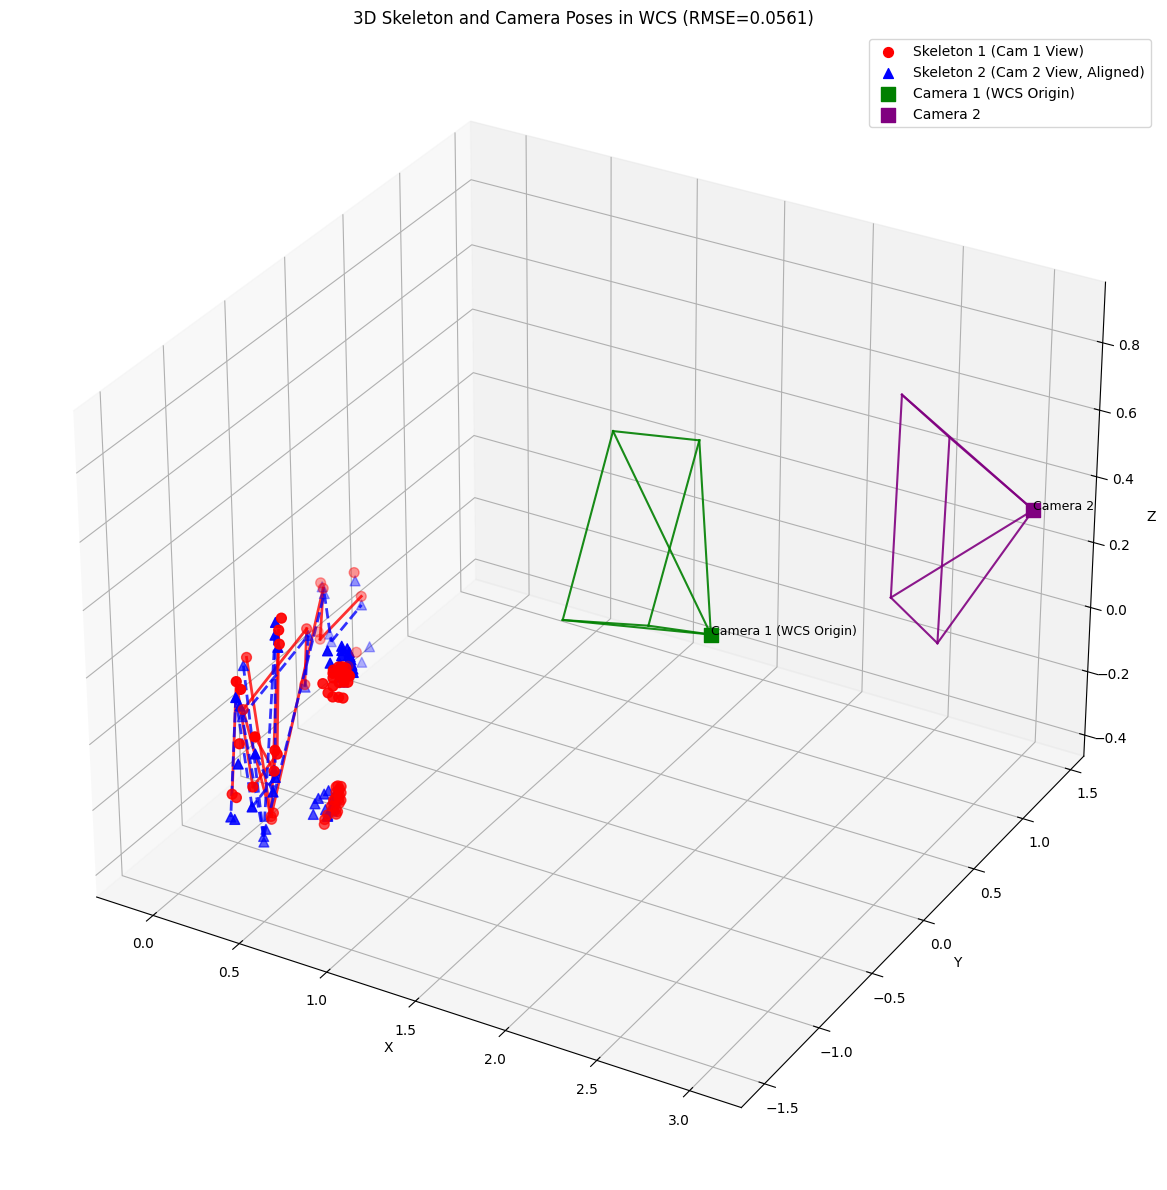

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R_scipy

# =========================================================================
# 1) H36M 17 关键点骨架连线定义
# =========================================================================
H36M17_EDGES = np.array([
    [0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], 
    [7, 8], [8, 9], [8, 10], [10, 11], [11, 12], [8, 13], [13, 14], [14, 15]
], dtype=np.int32)

# ---------- 2) Helper: rigid transform via SVD (Kabsch) ----------
def rigid_transform_3D(A, B):
    # (此函数保持不变，省略代码以保持简洁)
    assert A.shape == B.shape and A.shape[1] == 3
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B
    H = AA.T @ BB
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = Vt.T @ U.T
    t = centroid_B - R @ centroid_A
    return R, t


# =========================================================================
# 3) 相机绘制函数
# =========================================================================
def draw_camera(ax, R_wcs_to_cam, t_wcs_to_cam, scale=0.1, color='green', label='Camera'):
    """
    在 3D 坐标轴上绘制相机的金字塔模型。
    
    Args:
        R_wcs_to_cam (np.ndarray): WCS 到 Cam 的旋转矩阵 (3x3)。
        t_wcs_to_cam (np.ndarray): WCS 到 Cam 的平移向量 (3,)。
        scale (float): 相机模型的大小比例。
        color (str): 绘制颜色。
        label (str): 相机标签。
    """
    
    # 相机位姿通常定义为 WCS -> Cam 变换 (R, t)。
    # 要将相机模型画在 WCS 中，我们需要 Cam -> WCS 的逆变换。
    R_cam_to_wcs = R_wcs_to_cam.T
    t_cam_to_wcs = -R_wcs_to_cam.T @ t_wcs_to_cam
    
    # 1. 定义相机模型的基础点 (在相机坐标系中)
    # 假设 Cam Z 轴指向前方，Y 向下，X 向右。
    points_cam = np.array([
        [0, 0, 0], # 0: 光心 (Camera Center)
        [scale, scale, 2 * scale], # 1: 截锥体右上角
        [-scale, scale, 2 * scale], # 2: 截锥体左上角
        [-scale, -scale, 2 * scale], # 3: 截锥体左下角
        [scale, -scale, 2 * scale] # 4: 截锥体右下角
    ])

    # 2. 将相机点转换到 WCS
    # P_wcs = R_cam_to_wcs @ P_cam + t_cam_to_wcs
    points_wcs = (R_cam_to_wcs @ points_cam.T).T + t_cam_to_wcs

    # 3. 绘制截锥体的边缘
    edges = [
        (0, 1), (0, 2), (0, 3), (0, 4), # 从光心到四个角
        (1, 2), (2, 3), (3, 4), (4, 1) # 四个角连线
    ]
    
    for i, j in edges:
        p1 = points_wcs[i]
        p2 = points_wcs[j]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], 
                c=color, linewidth=1.5, alpha=0.9, linestyle='-')

    # 4. 绘制光心 (相机位置) 并添加标签
    center = points_wcs[0]
    ax.scatter(center[0], center[1], center[2], c=color, marker='s', s=100, label=label)
    ax.text(center[0], center[1], center[2], label, color='black', fontsize=9, zorder=20)


# =========================================================================
# 4) 统一绘图函数：同时绘制骨架和相机
# =========================================================================
def plot_full_wcs_scene(P_WCS_1, P_WCS_2, R_1_wcs, t_1_wcs, R_2_wcs, t_2_wcs, rmse):
    """
    绘制 WCS 下的两个骨架和两个相机。
    """
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.set_title(f'3D Skeleton and Camera Poses in WCS (RMSE={rmse:.4f})')
    
    # --- 绘制骨架 ---
    
    # P_WCS_1 (Source A, Cam 1 View)
    ax.scatter(P_WCS_1[:,0], P_WCS_1[:,1], P_WCS_1[:,2], label='Skeleton 1 (Cam 1 View)', marker='o', c='red', s=50)
    for a, b in H36M17_EDGES:
        ax.plot([P_WCS_1[a, 0], P_WCS_1[b, 0]],
                [P_WCS_1[a, 1], P_WCS_1[b, 1]],
                [P_WCS_1[a, 2], P_WCS_1[b, 2]], c='red', alpha=0.8, linewidth=2)
        
    # P_WCS_2 (Aligned A/Target B, Cam 2 View)
    ax.scatter(P_WCS_2[:,0], P_WCS_2[:,1], P_WCS_2[:,2], label='Skeleton 2 (Cam 2 View, Aligned)', marker='^', c='blue', s=50)
    for a, b in H36M17_EDGES:
        ax.plot([P_WCS_2[a, 0], P_WCS_2[b, 0]],
                [P_WCS_2[a, 1], P_WCS_2[b, 1]],
                [P_WCS_2[a, 2], P_WCS_2[b, 2]], c='blue', alpha=0.8, linewidth=2, linestyle='--')
        
    # --- 绘制相机 ---
    
    # 绘制 Cam 1
    # 我们知道 R_1, t_1 是 Cam 1 -> WCS 的逆变换。
    # draw_camera 需要 WCS -> Cam 的变换 (R_wcs_to_cam, t_wcs_to_cam)
    # Cam 1: R_wcs_to_cam = R_1, t_wcs_to_cam = t_1 (因为 WCS = Cam 1 坐标系)
    draw_camera(ax, R_1_wcs, t_1_wcs, scale=0.3, color='green', label='Camera 1 (WCS Origin)')
    
    # 绘制 Cam 2
    # Cam 2: R_wcs_to_cam = R_2, t_wcs_to_cam = t_2 (即 R_2|1, t_2|1)
    draw_camera(ax, R_2_wcs, t_2_wcs, scale=0.3, color='purple', label='Camera 2')

    # --- 设置视图 ---
    all_data = np.vstack([P_WCS_1, P_WCS_2])
    # 确保相机位置也包含在数据集中，以正确设置视图范围
    cam1_center = -R_1_wcs.T @ t_1_wcs
    cam2_center = -R_2_wcs.T @ t_2_wcs
    all_data = np.vstack([all_data, cam1_center, cam2_center])
    
    max_range = np.array([all_data[:, i].max() - all_data[:, i].min() for i in range(3)]).max() / 2.0
    mid = np.mean(all_data, axis=0)
    
    # ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
    # ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
    # ax.set_zlim(mid[2] - max_range, mid[2] + max_range)
    
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    fig.tight_layout()
    plt.show(fig)
    return fig


# =========================================================================
# 5) 实际执行步骤
# =========================================================================

# 1. 准备数据
Lt_n = left_outputs[0]['pred_keypoints_3d']    # P_1 (Cam 1 坐标系下的关键点)
Rt_n = right_outputs[0]['pred_keypoints_3d']   # P_2 (Cam 2 坐标系下的关键点)

# 2. 计算 Cam 2 相对于 Cam 1 (WCS) 的变换 (R_2|1, t_2|1)
R_2_from_1, t_2_from_1 = rigid_transform_3D(Lt_n, Rt_n)

# 3. 转换为 WCS 坐标
# Cam 1 骨架在 WCS 下的坐标 P_WCS_1
P_WCS_1 = Lt_n 

# Cam 2 骨架在 WCS 下的坐标 P_WCS_2 (已对齐)
P_WCS_2 = (Rt_n - t_2_from_1) @ R_2_from_1 

# 4. 定义相机姿态 (WCS -> Cam 变换)
# Cam 1 姿态 (WCS = Cam 1)
R_1_wcs_to_cam = R_scipy.from_rotvec(right_outputs[0]['global_rot']).as_matrix()

t_1_wcs_to_cam = right_outputs[0]['pred_cam_t']

print(R_1_wcs_to_cam.shape)
print(t_1_wcs_to_cam.shape)

# Cam 2 姿态 (WCS -> Cam 2 = Cam 1 -> Cam 2)
# R_2_wcs_to_cam = R_2_from_1
# t_2_wcs_to_cam = t_2_from_1
R_2_wcs_to_cam = R_scipy.from_rotvec(left_outputs[0]['global_rot']).as_matrix()
t_2_wcs_to_cam = left_outputs[0]['pred_cam_t']

# 5. 计算对齐误差
rmse = np.sqrt(np.mean(np.sum((P_WCS_1 - P_WCS_2)**2, axis=1)))


# 6. 绘图
figure = plot_full_wcs_scene(
    P_WCS_1, P_WCS_2, 
    R_1_wcs_to_cam, t_1_wcs_to_cam, 
    R_2_wcs_to_cam, t_2_wcs_to_cam, 
    rmse
)